## Задача 1

Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
Является ли значимым получившееся уравнение регрессии?

======================================================================================================================

Поскольку предполагается, что зависимость между предикторами и целевой переменной линейная, то для начала можно оценить коэффициент корреляции между признаками и целевой переменной. Изз полученных значений можно будет отобрать 2 максимально коррелированных и построить на них модель. Далее можно будет построить модель на всех признаках.

In [79]:
import numpy as np
from scipy import stats

In [4]:
x = np.array( [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214], [-0.18757272, 1.30337355, 5.12093014, 3.46363202], 
               [-0.81094525, 1.82463398, 5.79686488, 1.86159445], [ 0.75129018, 2.67392052, 3.65529809, 1.66746094], 
               [ 0.00972362, 1.97367255, 2.50594319, 1.69755173], [-0.62972637, 0.77750764, 2.84124027, 4.54410559], 
               [ 2.29536229, 1.81206697, 1.95026215, 1.51874636], [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203], 
               [ 2.39252799, 3.17563985, 3.61420599, 5.10773362], [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])
x

array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
       [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
       [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
       [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
       [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
       [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
       [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
       [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
       [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
       [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])

In [6]:
y = np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])
y

array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
        7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

In [50]:
np.corrcoef(y, x.reshape(4, -1))

array([[ 1.        , -0.18041424,  0.07685803, -0.45318614, -0.10329964],
       [-0.18041424,  1.        , -0.59179647,  0.3610479 , -0.34592518],
       [ 0.07685803, -0.59179647,  1.        , -0.4251272 ,  0.79642474],
       [-0.45318614,  0.3610479 , -0.4251272 ,  1.        , -0.34625427],
       [-0.10329964, -0.34592518,  0.79642474, -0.34625427,  1.        ]])

Судя по матрице корреляций максимальная связь между целевой переменной и первым (-0.18041424) и третьим (-0.45318614) параметром. Построим модель на их данных 

In [60]:
x1 = x[: , (0, 2)]
x1

array([[ 1.22401313,  3.03636353],
       [-0.18757272,  5.12093014],
       [-0.81094525,  5.79686488],
       [ 0.75129018,  3.65529809],
       [ 0.00972362,  2.50594319],
       [-0.62972637,  2.84124027],
       [ 2.29536229,  1.95026215],
       [ 0.0920418 ,  7.47708735],
       [ 2.39252799,  3.61420599],
       [ 0.54983815,  1.65752765]])

In [66]:
x1 = np.hstack((np.ones((x1.shape[0], 1)), x1))
x1

array([[ 1.        ,  1.22401313,  3.03636353],
       [ 1.        , -0.18757272,  5.12093014],
       [ 1.        , -0.81094525,  5.79686488],
       [ 1.        ,  0.75129018,  3.65529809],
       [ 1.        ,  0.00972362,  2.50594319],
       [ 1.        , -0.62972637,  2.84124027],
       [ 1.        ,  2.29536229,  1.95026215],
       [ 1.        ,  0.0920418 ,  7.47708735],
       [ 1.        ,  2.39252799,  3.61420599],
       [ 1.        ,  0.54983815,  1.65752765]])

Посчитаем 𝑏=(𝑋⊤𝑋)−1𝑋⊤𝑌. Посчитаем определитель матрицы Xtrasp_X

In [71]:
X1transp_X1 = x1.T.dot(x1)
np.linalg.det(X1transp_X1)

2835.3600226240915

Отлично, определитель не равен нулю, значит матрица не вырожденная, значит можно работать дальше. Посчитаем коэффициенты

In [72]:
X1_inv = np.linalg.inv(X1transp_X1)
b = X1_inv.dot(x1.T).dot(y)
b

array([3.62455695, 1.62531203, 1.21134979])

Посчитаем значения, моделируемые уравнением

In [74]:
y1_pred = x1.dot(b)
y1_pred

array([ 9.29205855,  9.52293042,  9.32854895,  9.2734825 ,  6.67593463,
        6.04279092,  9.71768655, 12.83152181, 11.89122916,  6.52606129])

Посчитаем коэффициент детерминации

In [76]:
var_of_y = np.sum((y - y.mean()) ** 2)
var_of_y1_pred = np.sum((y1_pred - y1_pred.mean()) ** 2)

In [80]:
r2_1 = 1 - var_of_y1_pred / var_of_y
r2_1

0.23657537612068402

Посчитаем насколько значимым получилось значение коэффициента

In [82]:
r1_stats = (r2_1 / 2) / ((1 - r2_1) / (10 - 2 - 1))
r1_stats

1.0846045444733894

In [83]:
stats.f(2, 7).ppf(0.95)

4.73741412777588

Как видно коэффициент получился не значимым....модель плохо объясняет взаимосвязь между переменными. Тогда попробуем сделать функцию, которая будет выбирать наилучшее значение предикторов из массива

In [101]:
def best_linear(x_in, y, n_predictors, alpha):
    from scipy import stats
    from itertools import combinations
    output = {}
    for predictors in combinations(range(4), n_predictors):
        x = x_in[:, predictors]
        x = np.hstack((np.ones((x.shape[0], 1)), x))
        if np.linalg.det(x.T.dot(x)) != 0:
            b = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
            y_pred = x.dot(b)
            var_y = np.sum((y - y.mean()) ** 2)
            var_y_pred = np.sum((y_pred - y_pred.mean()) ** 2)
            R2 = 1 - var_y_pred / var_y
            F_test = (R2 / n_predictors) / ((1 - R2) / (y.shape[0] - n_predictors - 1))
            F_criteria = stats.f(n_predictors, y.shape[0] - n_predictors - 1).ppf(1 - alpha)
            output[predictors] = {"coefs" : b, "R2": R2, "F-test": F_test, "F-criteria": F_criteria}
        else:
            output[predictors] = {"coefs" : "Nd", "R2": "Nd", "F-test": "Nd", "F-criteria": "Nd"}
    return output

In [102]:
total_estimation = best_linear(x, y, 2, 0.05)

In [103]:
from pprint import pprint

In [104]:
pprint(total_estimation)

{(0, 1): {'F-criteria': 4.73741412777588,
          'F-test': 15.822503620838194,
          'R2': 0.8188640525741471,
          'coefs': array([6.70781579, 0.40786841, 1.03360247])},
 (0, 2): {'F-criteria': 4.73741412777588,
          'F-test': 1.0846045444733894,
          'R2': 0.23657537612068402,
          'coefs': array([3.62455695, 1.62531203, 1.21134979])},
 (0, 3): {'F-criteria': 4.73741412777588,
          'F-test': 4.22121254674711,
          'R2': 0.5467033216855914,
          'coefs': array([5.70686123, 0.68359949, 1.12650707])},
 (1, 2): {'F-criteria': 4.73741412777588,
          'F-test': 2.887464236829701,
          'R2': 0.45205172659609916,
          'coefs': array([2.48896193, 1.60611956, 0.86269915])},
 (1, 3): {'F-criteria': 4.73741412777588,
          'F-test': 2.273618946961995,
          'R2': 0.3937944238870049,
          'coefs': array([1.91685221, 1.74373667, 1.31971882])},
 (2, 3): {'F-criteria': 4.73741412777588,
          'F-test': 2.123013982734529,
      

Как видно наилучшее значение коэффициента детерминации приходится на первый и второй фактор. Остальные показывают низкий коэффициент и при этом абсолютно незначимый. Попробуем увеличить количество предикторов...

In [105]:
pprint(best_linear(x, y, 3, 0.05))

{(0, 1, 2): {'F-criteria': 4.757062663089414,
             'F-test': 0.5970123700341835,
             'R2': 0.22988429971410773,
             'coefs': array([3.05093578, 1.47184411, 0.35994664, 1.18613078])},
 (0, 1, 3): {'F-criteria': 4.757062663089414,
             'F-test': 1.2991886992914432,
             'R2': 0.39379035808726737,
             'coefs': array([1.92730381, 0.00577727, 1.73831388, 1.31884085])},
 (0, 2, 3): {'F-criteria': 4.757062663089414,
             'F-test': 0.09927823656827942,
             'R2': 0.04729160472342675,
             'coefs': array([1.86104323, 1.45255885, 1.08866659, 0.86832876])},
 (1, 2, 3): {'F-criteria': 4.757062663089414,
             'F-test': 0.20577527306700963,
             'R2': 0.09328931898891513,
             'coefs': array([-0.93150987,  1.89273576,  0.76446767,  1.191479  ])}}


Увеличение до 3 не дает прироста прогнозной силы, попробуем на одном кожффициенте

In [106]:
pprint(best_linear(x, y, 1, 0.05))

{(0,): {'F-criteria': 5.317655071578714,
        'F-test': 56.68488701321836,
        'R2': 0.8763235066273641,
        'coefs': array([8.65577259, 0.79916937])},
 (1,): {'F-criteria': 5.317655071578714,
        'F-test': 42.03543182396818,
        'R2': 0.8401133015470887,
        'coefs': array([6.16968772, 1.40031561])},
 (2,): {'F-criteria': 5.317655071578714,
        'F-test': 15.566396899855567,
        'R2': 0.6605335964595831,
        'coefs': array([6.08530039, 0.80331058])},
 (3,): {'F-criteria': 5.317655071578714,
        'F-test': 14.007730088313183,
        'R2': 0.6364913615399046,
        'coefs': array([5.95676418, 1.17838487])}}


Ну это так....теста ради сделано. Но на реальных данных я бы брал модель с одним предиктором...который самый первый.

============================================================================================================

## Задача 2

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница A была посещена 2509 раз, из них 77 закончились совершением покупки, страница B была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах A и B?

=======================================================================================================================

Тут я честно говоря либо не до конца понимаю условия задачи, либо не совсем улавливаю тему урока. Т.е. понятно что проходили дисперсионный анализ и его нужно сюда как-то прикрутить....но честно на этих данных дисперсии я не вижу))...в чем дисперсия должна проявляться когда у нас случайное событие бинарное....пришел/не пришел....  Если говорить о количестве посетителей сайта или количестве покупок за единицу времени.....то это тянет больше на тесты с распределением пуассона или экспоненциальным распределением.....в зависимости что нужно предсказывать.  Я честно признаться в этой задаче вижу что нужно оценить является ли фактор страницы интернет магазина значимым или нет....как по мне для данной задачи очень хорошо ложится анализ таблиц сопряженности. Попробую сделать задачу на его основе. Изначально данные будут выглядеть таким образом:    
1. по строкам кукпил/не купил  
2. по столбцам - сайт А сайт В    

В качестве нулевой гипотезы выступает предположение об отсутсвии взаимосвязи в данных. Т.е. если нулевая гипотеза верна статистически незначимо различается поведение пользователей на сайте A и на сайте B

In [109]:
table = np.array([[77, 60],[2509 - 77, 1465 - 60]])
table

array([[  77,   60],
       [2432, 1405]])

Посчитаем ожидаемые значения

In [111]:
expected_table = np.array([[(77 + 60) * (77 + 2432) / (2509 + 1465), (77 + 60) * (60 + 1405) / (2509 + 1465)],
                           [(77 + 2432) * (2432 + 1405) / (2509 + 1465), (60 + 1405) * (2432 + 1405) / (2509 + 1465)]])
expected_table

array([[  86.49547056,   50.50452944],
       [2422.50452944, 1414.49547056]])

Посчитаем статистику по таблицам 

In [114]:
np.sum(((table - expected_table) **2) / expected_table)

2.928639523240744

Для нашей задачи надо задать распределение хи квадрат с двумя степенями свободы, поскольку у нас две градации фактора и два наблюдаемых исхода. Проверка гипотезы будет правосторонняя, поскольку значение статистики изменяется от нуля и до бесконечности, а нам нужно попасть в критическую область справа, если хотим доказать что в данные статистически различны

In [115]:
stats.chi(df=2).ppf(0.95)

2.447746830680816

Данные нашей статистики попадают в критический диапазон. Таким образом мы отвергаем нулевую гипотезу и говорим о том, что в поведении покупателей на сайте A и на сайте B есть статистически значимые различия. Это в принципе все выводы которые мы можем сделать по этим данным

=========================================================================================================================

## Задача 3

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
По каждой паре выборок посчитайте:

выборочное среднее и дисперсию каждой выборки,
коэффициент корреляции Пирсона и прямую линейной регрессии.
Убедившись в том, что они не практически не отличаются, постройте scatter plot по каждой паре выборок.

In [116]:
x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
x2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])
x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

In [123]:
def calculate_all(x: np.array, y: np.array):
    output = {}
    output["mean_x"] = x.mean()
    output["mean_y"] = y.mean()
    output["std_x"] = x.std(ddof=1)
    output["mean_y"] = y.std(ddof=1)
    output["Pearson_corr"] = np.corrcoef(x, y)[0, 1]
    
    slope = np.cov(x, y, ddof=1)[0, 1] / np.var(x, ddof=1)
    intercept = y.mean() - x.mean() * slope
    output["equation"] = f"y = {slope}*x + {intercept}"
    
    return output

In [127]:
pprint(calculate_all(x1, y1))
print("-"*100)
pprint(calculate_all(x2, y2))
print("-"*100)
pprint(calculate_all(x3, y3))
print("-"*100)
pprint(calculate_all(x4, y4))
print("-"*100)

{'Pearson_corr': 0.81642051634484,
 'equation': 'y = 0.5000909090909093*x + 3.0000909090909094',
 'mean_x': 9.0,
 'mean_y': 2.031568135925815,
 'std_x': 3.3166247903554}
----------------------------------------------------------------------------------------------------
{'Pearson_corr': 0.8162365060002428,
 'equation': 'y = 0.5000000000000001*x + 3.000909090909089',
 'mean_x': 9.0,
 'mean_y': 2.0316567355016177,
 'std_x': 3.3166247903554}
----------------------------------------------------------------------------------------------------
{'Pearson_corr': 0.8162867394895984,
 'equation': 'y = 0.49972727272727285*x + 3.002454545454544',
 'mean_x': 9.0,
 'mean_y': 2.030423601123667,
 'std_x': 3.3166247903554}
----------------------------------------------------------------------------------------------------
{'Pearson_corr': 0.8165214368885028,
 'equation': 'y = 0.49990909090909086*x + 3.0017272727272735',
 'mean_x': 9.0,
 'mean_y': 2.0305785113876023,
 'std_x': 3.3166247903554}
---------

In [129]:
import matplotlib.pyplot as plt
from pylab import rcParams
plt.style.use("fivethirtyeight")

#%matplotlib inline
%config InlineBackend.figure_format = "svg"
rcParams["figure.figsize"] = 5, 3

Text(0.5, 1.0, 'X4 vs Y4')

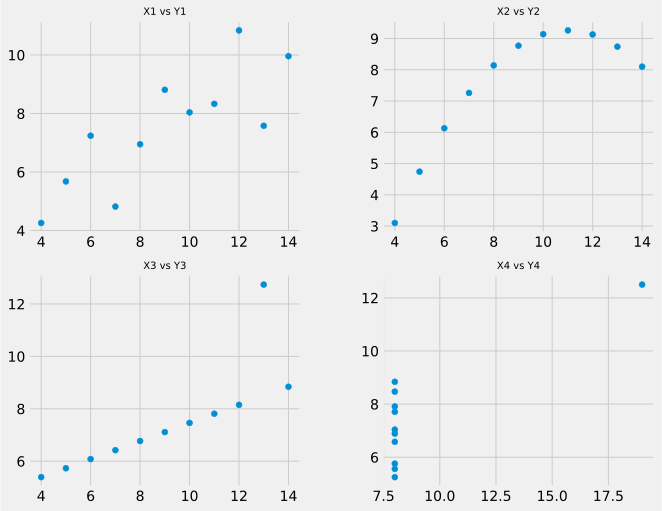

In [140]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = axes.flatten()
fig.subplots_adjust(wspace=0.3)
fig.set_size_inches(10,8)

ax1.scatter(x1, y1)
ax1.set_title("X1 vs Y1", fontdict={"fontsize": 10})

ax2.scatter(x2, y2)
ax2.set_title("X2 vs Y2", fontdict={"fontsize": 10})

ax3.scatter(x3, y3)
ax3.set_title("X3 vs Y3", fontdict={"fontsize": 10})

ax4.scatter(x4, y4)
ax4.set_title("X4 vs Y4", fontdict={"fontsize": 10})

В целом намек понятен)))....чисто статистически линейнаая может давать хорошие результаты, но по факту она минимизирует среднюю ошибку. Самые классные примеры которые это иллюстрируют это третий и четвертый))